# Supervised Learning, KNN


In [2]:
import mglearn
import sklearn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree

An example of synthetic dataset is returned by the package mglearn by the method make_forge().

X.shape:  (26, 2)


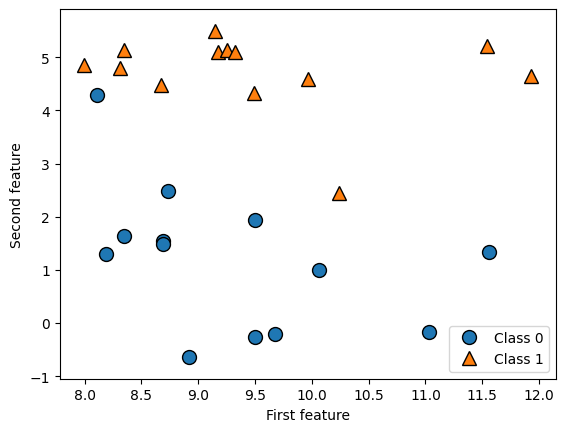

In [3]:
# generate dataset
# X - dataset feature matrix
# y - label vector
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: ", X.shape)

The task is (Binary) classification. Learn the model (curve) that is able to identify the elements belonging to class 1 and class 0. 

We complement the synthetic dataset with a real-world example, i.e. the Wisconsin Breast Cancer Dataset  which records breast cancer tumors. Each tumor is benign or malignant. The supervised task is to predict whether a tumor is malignant based on the measurements of the tissue.

In [4]:
cancer = load_breast_cancer()
print(f"cancer.keys():\n {cancer.keys()}")

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(f"Shape of cancer data: {cancer.data.shape}")

Shape of cancer data: (569, 30)


In [6]:
print("Sample counts per class: \n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class: 
 {'malignant': 212, 'benign': 357}


In [7]:
print(f"Feature names:\n {cancer.feature_names}")

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

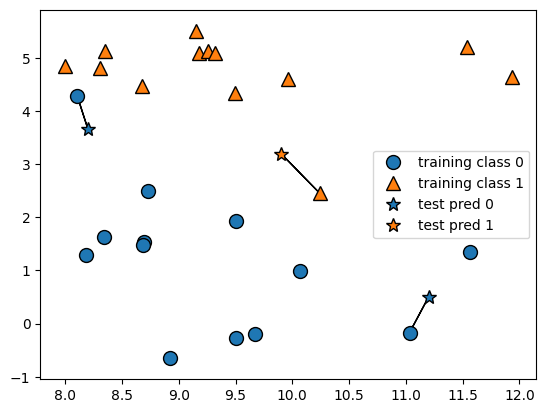

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1) # k=1 - get label of the nearest neighbour

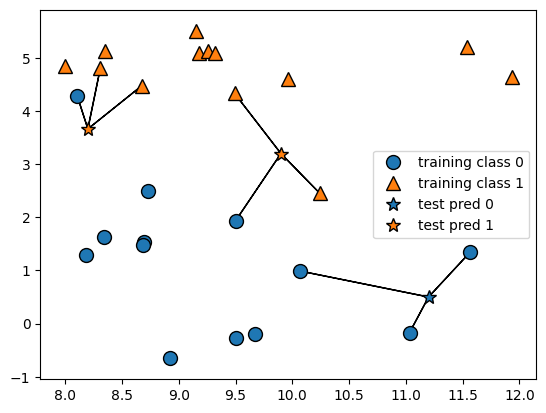

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In SKLearn, sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods. SKLearn implements two different nearest neighbors classifiers:
- KNeighborsClassifier implements learning based on the nearest neighbors of each query point, where n_neighbors is an integer value specified by the user.
- RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius of each training point, where r is a floating-point value specified by the user.

The neighbors classification in KNeighborsClassifier is the most commonly used technique.

In [11]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

We can show the prediction for all possible test points in the xy-plane and highlight the decision boundary which divide between where the algorithm identifies the class 0 versus the region assigned to the class 1.

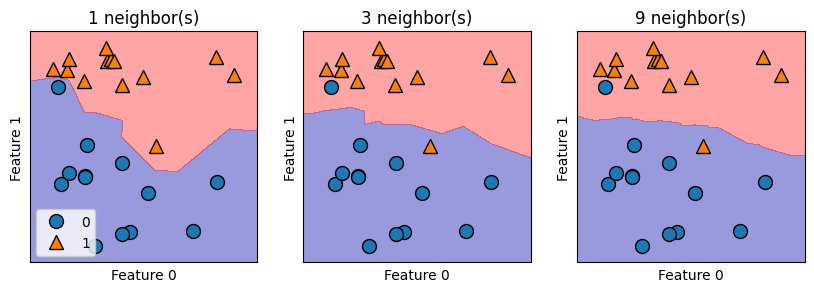

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

A single neighbor results in a decision boundary that follows the data in the training set closely. By increasing the number of neighbors we get a smoother decision boundary, i.e. a simpler model:
    - few neighbors => higher model complexity
    - more neighbors => lower model complexity
    
In the case of a real dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

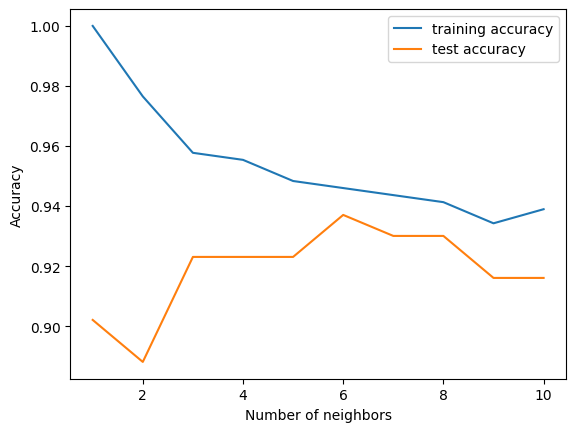

In [14]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()

- When we evaluate on the test set, we measure the generalization capability of the model, i.e. how the model behaves on unseen data.

Query for k-nearest neighbors

In [15]:
tree = KDTree(X, leaf_size=3)
dist, ind = tree.query([X[0, :]], k = 3)
print(f"query point: {[X[0, :]]}")
print(f"Nearest neighbors:\n {X[ind, :]}")
print(f'Distances from the query point: {dist}')

query point: [array([9.96346605, 4.59676542])]
Nearest neighbors:
 [[[9.96346605 4.59676542]
  [9.49123469 4.33224792]
  [9.32298256 5.09840649]]]
Distances from the query point: [[0.         0.54126885 0.81354955]]


In [16]:
tree = KDTree(X, leaf_size=2)
print(f'Number of points within a radius 1: {tree.query_radius(X[:1], r=1, count_only=True)[0]}')
ind = tree.query_radius(X[:1], r=1)
print(f'Points: \n{X[ind[0], :]}')

Number of points within a radius 1: 5
Points: 
[[9.17748385 5.09283177]
 [9.25694192 5.13284858]
 [9.32298256 5.09840649]
 [9.49123469 4.33224792]
 [9.96346605 4.59676542]]
